In [1]:
import glob, os
import numpy as np
from sklearn import linear_model
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# fetching the file with 'txt' filename ext.
#for file in glob.glob("*.txt"):
#    print(file)

In [3]:
# open and rename the column names of the imported files
best = pd.read_csv('BestIncome.txt', sep=',', header=None)
survey = pd.read_csv('SurvIncome.txt', sep=',', header=None)
best = best.rename(index=int, columns={0:'lab_inc', 1:'cap_inc', 2:'hgt', 3: 'wgt'})
survey = survey.rename(index=int, columns={0:'tot_inc',1:'wgt',2:'age',3:'gender'})

In [4]:
best.head()

,lab_inc,cap_inc,hgt,wgt
0,52655.605507,9279.509829,64.568138,152.920634
1,70586.979225,9451.016902,65.727648,159.534414
2,53738.008339,8078.132315,66.268796,152.502405
3,55128.180903,12692.670403,62.910559,149.218189
4,44482.794867,9812.975746,68.678295,152.726358


In [5]:
tot_inc_best = best.lab_inc + best.cap_inc
x_best = np.column_stack((tot_inc_best, best.wgt))

In [6]:
# with the common features: tot_inc and wgt
# age ~ tot_inc and wgt
x = np.column_stack((survey.tot_inc, survey.wgt))
y_age = survey.age.values
y_gender = survey.gender.values

# simple linear regression: age ~ tot_inc + wgt
regr_age = linear_model.LinearRegression()
regr_age.fit(x, y_age)

# logistic regression: gender ~ tot_inc + wgt
regr_gender = linear_model.LogisticRegression()
regr_gender.fit(x, y_gender)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
# compute the predicted age and gender based on te information in best
pred_age = regr_age.predict(x_best)
pred_gender = regr_gender.predict(x_best)

In [8]:
# simple append the predictions onto the best dataset
imputed_best = np.column_stack((best, pred_age, pred_gender))

In [9]:
new_best = pd.DataFrame({'lab_inc':imputed_best[:,0],'cap_inc':imputed_best[:,1],
                         'hgt':imputed_best[:,2],'wgt':imputed_best[:,3],
                         'age':imputed_best[:,4],'gender':imputed_best[:,5]})

In [10]:
new_best.describe()

,lab_inc,cap_inc,hgt,wgt,age,gender
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,57052.925133,9985.798563,65.014021,150.006011,44.890828,0.471700
std,8036.544363,2010.123691,1.999692,9.973001,0.219150,0.499223
min,22917.607900,1495.191896,58.176154,114.510700,43.976495,0.000000
25%,51624.339880,8611.756679,63.652971,143.341979,44.743776,0.000000
50%,56968.709935,9969.840117,65.003557,149.947641,44.886944,0.000000
75%,62408.232277,11339.905773,66.356915,156.724586,45.038991,1.000000
max,90059.898537,19882.320069,72.802277,185.408280,45.703819,1.000000


In [11]:
corr = new_best.corr()
corr.style.background_gradient()

,lab_inc,cap_inc,hgt,wgt,age,gender
lab_inc,1,0.0053253,0.00278978,0.00450691,0.924053,0.677675
cap_inc,0.0053253,1,0.0215716,0.00629868,0.234159,0.176901
hgt,0.00278978,0.0215716,1,0.172103,-0.0450828,-0.0669724
wgt,0.00450691,0.00629868,0.172103,1,-0.300288,-0.382659
age,0.924053,0.234159,-0.0450828,-0.300288,1,0.78426
gender,0.677675,0.176901,-0.0669724,-0.382659,0.78426,1


In [12]:
import matplotlib.pyplot as plt

def plot_corr(df,size=10):
    '''
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot
    '''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

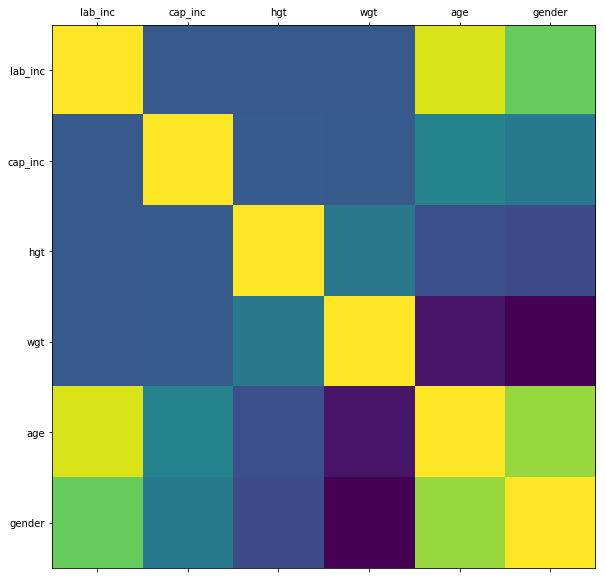

In [13]:
plot_corr(new_best)

In [14]:
def corr_plot(df):
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    
    names = df.columns
    N = len(names)
    
    correlations = df.corr()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(correlations, vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0,N,1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

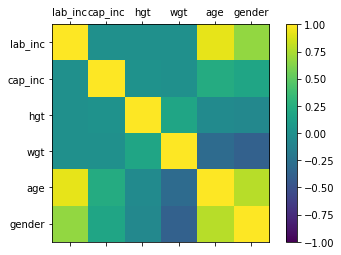

In [15]:
corr_plot(new_best)